# Лабораторная работа 8.1

## Определение постоянных Стефана-Больцмана и Планка из анализа теплового излучения накаленного тела

In [30]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit

In [31]:
def line(x, a, b):
    return a * x + b

## 1. Изучение работы оптического пирометра

Проведем измерение температуры с помощью пирометра и термопары.

In [32]:
data = pd.read_csv('data/first.csv', sep = '\t')
pir = np.array(data.t_pir)
term = np.array(data.t_term)

print(pir.sum()/len(pir), term.sum()/len(term) + 23)

982.5 943.0


Как мы видим, значения температуры почти не отличаются и оптический пирометр работает корректно.

## 2. Измерение яркостной температуры накаленных тел

Покажем, что различные тела, накаленные до одинаковой термодинамической температуры, имеют различную яркостную температуру.

In [33]:
data = pd.read_csv('data/second.csv', sep = '\t')
print(data)

   material  t_pir
0         1    843
1         2    786
2         3    849


Как мы видим, яркостная температура различается для каждого материала, при одинаковой термодинамической температуре.
Это вызвано разностью значений коэффициента излучения для каждого из материалов.

## 3. Проверка закона Стефана-Больцмана

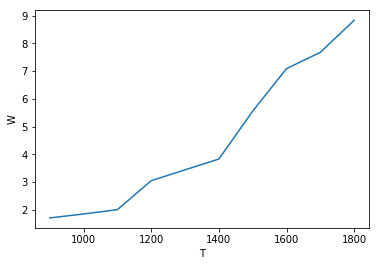

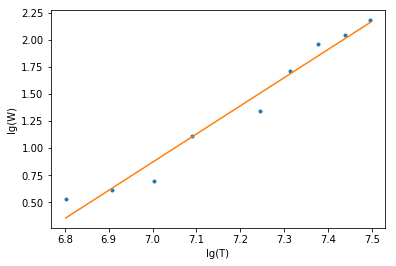

n =  2.5994351067958696


In [34]:
data = pd.read_csv('data/third.csv', sep = '\t')

I = np.array(data.I)
U = np.array(data.U)
T = np.array(data.t_abs)
E = np.array(data.E)
W = I * U

plt.plot(T, W)
plt.xlabel("T")
plt.ylabel("W")
plt.show()

res = curve_fit(f=line, xdata=np.log(T), ydata=np.log(W))
popt, pcov = res
a, b = popt

plt.plot(np.log(T), np.log(W), ".")
plt.plot(np.log(T), line(np.log(T), a, b))
plt.xlabel("lg(T)")
plt.ylabel("lg(W)")
plt.show()
print("n = ", a)

Как мы видим, значение полученного нами коэффициента близко к 4.

### Вычислим постоянную Стефана-Больцмана

In [42]:
S = 0.36

data_1700 = data[data.t_abs >= 1400]
I = np.array(data_1700.I)
U = np.array(data_1700.U)
T = np.array(data_1700.t_abs + 273)
E = np.array(data_1700.E)
W = I * U
W *= 10**7
q = W / E / S / T**4

Eq = q.sum() / len(q)
print(Eq)
Sq = 0
for i in q:
    Sq += (i - Eq)**2
Sq /= len(q)
Sq **= 0.5
print(q.std())

7.580469143117532e-05
1.0507207595411821e-05


### Вычислить постоянную Планка

In [36]:
k = 1.38 * 10**(-16)
c = 3 * 10**10
h = ((2 * np.pi**5 * k**4) / (15 * c ** 2 * q)) ** (1 / 3)

Eh = h.sum() / len(q)
print(Eh)
Sh = 0
for i in h:
    Sh += (i - Eh)**2
Sh /= len(h)
Sh **= 0.5
print(Sh)

6.0358944264996344e-27
2.9522750328769217e-28
